In [1]:
import numpy as np
from numpy.random import uniform,choice
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
from math import sqrt

## generate $\sigma^2$, $\tau^2$ and calculate heterogeneity measure $J^2$ as in the paper

In [2]:
def tau_star(sigma,tau):
    return tau/sigma
def J_square(sigma_square,tau_square):
    return tau_square/(tau_square+sigma_square)

In [3]:
# each element of `parameter_constellation` has the form (mu,sigma^2,tau^2) 
# where tau^2 is the between-study variance, sigma^2*u_i is the within-study variance
parameter_constellation = [(0,12,4),(0,9,4),(0,4,4),(0,2,6)]
l = len(parameter_constellation)

sigma_square_array = np.array([])
tau_square_array = np.array([])
J_square_array = np.array([])

for i in range(l):
    sigma_square_i = parameter_constellation[i][1]
    tau_square_i = parameter_constellation[i][2]
    J_square_i = J_square(sigma_square_i,tau_square_i)
    sigma_square_array = np.append(sigma_square_array,sigma_square_i)
    tau_square_array = np.append(tau_square_array,tau_square_i)
    J_square_array = np.append(J_square_array, J_square_i)
    
print('sigma square =', sigma_square_array)
print('tau square =', tau_square_array)
print('J square =', J_square_array)


sigma square = [12.  9.  4.  2.]
tau square = [4. 4. 4. 6.]
J square = [0.25       0.30769231 0.5        0.75      ]


In [4]:
# k: the number of studies
k_list = [10,30,50,100]
k_max = max(k_list)

# u_i ~ Uniform(0.02,0.2)
u_i_full_array = uniform(0.02,0.2,k_max)

# fix all u_i to get rid of randomness
# Note: all u_i corresponding to different k should sample from the same full list 
def u_i_array_generator(u_i_full_array,k):
    return choice(u_i_full_array,k)

u_i_array_10 = u_i_array_generator(u_i_full_array,10)
u_i_array_30 = u_i_array_generator(u_i_full_array,30)
u_i_array_50 = u_i_array_generator(u_i_full_array,50)


## Firstly, calculate $$a=\frac{\sum \limits_{i=1}^{k} \frac{u_i}{(\tau^2+\sigma^2 u_i)^2} \cdot \sum \limits_{i=1}^{k} \frac{u_i}{(\tau^2+\sigma^2 u_i)^2}}{\sum \limits_{i=1}^{k} \frac{u_i^2}{(\tau^2+\sigma^2 u_i)^2} \cdot \sum \limits_{i=1}^{k} \frac{1}{(\tau^2+\sigma^2 u_i)^2}}$$ and the variation ratio = $\frac{1}{1-a}$

In [5]:
def variance_ratio(u_i_array,sigma_square,tau_square):
    # firstly, calculate the frequently appeared term: 1/(tau^2 + sigma^2*u_i)^2
    common_term = 1/(tau_square + sigma_square*u_i_array)**2
    a = np.sum(u_i_array*common_term)**2/(np.sum(u_i_array**2*common_term)*np.sum(common_term))
    variance_ratio = 1/(1-a)
    return variance_ratio

## 1. plot of standard deviation ratio against heterogeniety measures J^2, with varying number of studies (k=10,30,50,100)

[12.  9.  4.  2.]
the number of studies is: 10
the standard deviation ratio = [2.39712382 2.42260075 2.48074381 2.52358552]
the number of studies is: 30
the standard deviation ratio = [2.53342787 2.56981184 2.6486314  2.7038401 ]
the number of studies is: 50
the standard deviation ratio = [2.17933313 2.20140508 2.2488087  2.28202339]
the number of studies is: 100
the standard deviation ratio = [2.27160022 2.31036371 2.39253586 2.44910021]


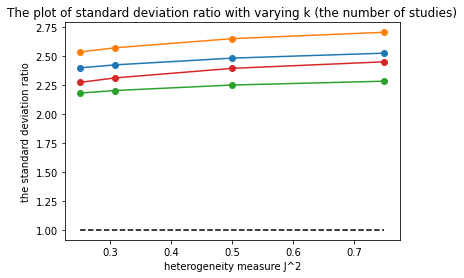

In [6]:
print(sigma_square_array)

def plot_standard_deviation_ratio(u_i_array):
    standard_deviation_ratio_array = np.array([])
    for i in range(l):
        sigma_square_i = sigma_square_array[i]
        tau_square_i = tau_square_array[i]
        variance_ratio_i = variance_ratio(u_i_array,sigma_square_i,tau_square_i)
        standard_deviation_ratio_array= np.append(standard_deviation_ratio_array,sqrt(variance_ratio_i)) 
    print('the number of studies is:',np.shape(u_i_array)[0])
    print('the standard deviation ratio =',standard_deviation_ratio_array)

    plt.scatter(J_square_array, standard_deviation_ratio_array)
    plt.plot(J_square_array, standard_deviation_ratio_array)
    return standard_deviation_ratio_array

k10_info = plot_standard_deviation_ratio(u_i_array_10)
k30_info = plot_standard_deviation_ratio(u_i_array_30)
k50_info = plot_standard_deviation_ratio(u_i_array_50)
k100_info = plot_standard_deviation_ratio(u_i_full_array)

# ideally, the variance ratio is approaching the horizontal line: y=1
plt.hlines(y=1,xmin=min(J_square_array),xmax=max(J_square_array),linestyles='dashed')
plt.title('The plot of standard deviation ratio with varying k (the number of studies)')
plt.xlabel('heterogeneity measure J^2')
plt.ylabel('the standard deviation ratio')
plt.show()

In [7]:
# from pd.dataframe to latex table
plot1_df = pd.DataFrame({'J_square': J_square_array,
                         'k=10': k10_info,
                         'k=30': k30_info,
                         'k=50': k50_info,
                         'k=100': k100_info
                   })
#print(plot1_df.to_latex(index=False))

### table of standard deviation ratio with varying $k$ and $J^2$
|      J^2 |     k=10 |     k=30 |     k=50 |    k=100 |
|---------:|---------:|---------:|---------:|---------:|
| 0.250000 | 2.122284 | 2.751944 | 2.276870 | 2.197752 |
| 0.307692 | 2.158271 | 2.780151 | 2.308382 | 2.229059 |
| 0.500000 | 2.237563 | 2.833035 | 2.372688 | 2.293944 |
| 0.750000 | 2.294469 | 2.865107 | 2.415502 | 2.337847 |

### Conclusion
1. the number of studies involved (k) does not have a significant influence on the standard deviation ratio.

2. increasing heterogeniety measure $J^2$ (the proportion of the between-study variance over total variances) $\Rightarrow$ increasing standard deviation ratio

## 2. plot of standard deviation ratio against heterogeniety measures J^2, with a fixed number of studies (k=100)
## when we fix the $n_{\min} \approx 5$ , and only change the ratio $n_{\max}/n_{\min}$

the number of studies is: 100
the standard deviation ratio = [2.25388467 2.30648271 2.41583384 2.48939004]
the number of studies is: 100
the standard deviation ratio = [1.72046336 1.76215834 1.84729548 1.90366923]
the number of studies is: 100
the standard deviation ratio = [1.9619713  2.00961447 2.10672087 2.17097482]
the number of studies is: 100
the standard deviation ratio = [1.96888258 2.00997183 2.09520926 2.15288008]
the ratio of n_max/n_min is [9.827425361740502, 122.43396504286183, 81.36400814215894, 410.47170483233816]


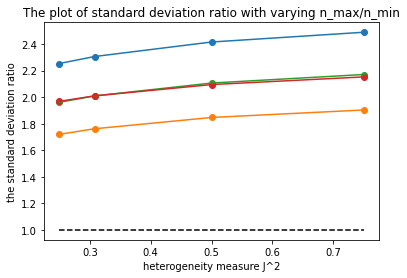

In [8]:
u_i_lower_bound = [2e-2,2e-5,2e-8,2e-11]
# fix the number of studies: k = 100
n_studies = 100
results_array = np.zeros((4, 4))
max_min_ratio = list()
for j in range(4):
    element = u_i_lower_bound[j]
    u_i_array = uniform(element,0.2,n_studies)
    n_i_array = 1/u_i_array
    #print('the range of n_i is:',min(n_i_array), max(n_i_array))
    #print('the corresponding n_max/n_min ratio is', max(n_i_array)/min(n_i_array))
    max_min_ratio.append(max(n_i_array)/min(n_i_array))
    each_result = plot_standard_deviation_ratio(u_i_array)
    results_array[j:] = each_result
print('the ratio of n_max/n_min is',max_min_ratio)

#print(results_array)

plt.hlines(y=1,xmin=min(J_square_array),xmax=max(J_square_array),linestyles='dashed')
plt.title('The plot of standard deviation ratio with varying n_max/n_min')
plt.xlabel('heterogeneity measure J^2')
plt.ylabel('the standard deviation ratio')
plt.show()

In [9]:
# from pd.dataframe to latex table
plot2_df = pd.DataFrame({'J_square': J_square_array,
                         'n_max/n_min = 8.03': results_array[0],
                         'n_max/n_min = 35.76': results_array[1],
                         'n_max/n_min = 92.70': results_array[2],
                         'n_max/n_min = 249.95': results_array[3]
                   })
#print(plot2_df.to_latex(index=False))

### table of standard deviation ratio with varying $\frac{n_{\max}}{n_{\min}}$ and $J^2$
|      J^2 | n_max/n_min = 8.03 | n_max/n_min = 35.76 | n_max/n_min = 92.70 | n_max/n_min = 249.95 |
|---------:|-------------------:|--------------------:|--------------------:|---------------------:|
| 0.250000 |           2.315210 |            1.707612 |            1.910412 |             1.901214 |
| 0.307692 |           2.345786 |            1.741020 |            1.953030 |             1.951590 |
| 0.500000 |           2.408525 |            1.811147 |            2.040909 |             2.055025 |
| 0.750000 |           2.450213 |            1.858965 |            2.099849 |             2.123885 |

### Conclusion
1. larger ratio of $n_{\max}/n_{\min} \Rightarrow$ the standard deviation ratio is closer to $1$; 

2. the standard deviation ratio is very close to $1$ when $n_{\max}/n_{\min}$ is large enough (which supports the theoretical derivation)}

## 3. plot of standard deviation ratio against heterogeniety measures J^2, with a fixed number of studies (k=100)
## when we fix the ratio $n_{\max}/n_{\min} \approx 10$, and only change $n_{\min}$

In [10]:
k_max = 100

n_min_list = list()
max_min_ratio_list = list()

u_i_array_1 = uniform(0.02,0.2,k_max)
n_i_array_1 = 1/u_i_array_1
n_min_list.append(min(n_i_array_1))
max_min_ratio_list.append(max(n_i_array_1)/min(n_i_array_1))

u_i_array_2 = uniform(0.01,0.1,k_max)
n_i_array_2 = 1/u_i_array_2
n_min_list.append(min(n_i_array_2))
max_min_ratio_list.append(max(n_i_array_2)/min(n_i_array_2))

u_i_array_3 = uniform(0.005,0.05,k_max)
n_i_array_3 = 1/u_i_array_3
n_min_list.append(min(n_i_array_3))
max_min_ratio_list.append(max(n_i_array_3)/min(n_i_array_3))

u_i_array_4 = uniform(0.0025,0.025,k_max)
n_i_array_4 = 1/u_i_array_4
n_min_list.append(min(n_i_array_4))
max_min_ratio_list.append(max(n_i_array_4)/min(n_i_array_4))

print('the minimum n is',n_min_list)
print('the ratio of n_max and n_min is', max_min_ratio_list)

the minimum n is [5.04172110054648, 10.188853388246907, 20.151565303136202, 41.36396576704348]
the ratio of n_max and n_min is [9.552920784985796, 9.56947629278341, 8.71398298802474, 9.283560243145068]


the number of studies is: 100
the standard deviation ratio = [2.07594818 2.10650337 2.17103421 2.21524485]
the number of studies is: 100
the standard deviation ratio = [2.07573291 2.09580765 2.13443435 2.158271  ]
the number of studies is: 100
the standard deviation ratio = [2.27484385 2.28999638 2.31714191 2.3326919 ]
the number of studies is: 100
the standard deviation ratio = [2.23438184 2.24216935 2.25566237 2.26313614]


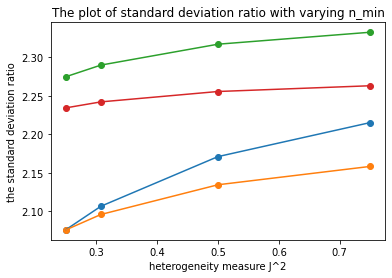

In [11]:
min_5_result = plot_standard_deviation_ratio(u_i_array_1)
min_10_result = plot_standard_deviation_ratio(u_i_array_2)
min_20_result = plot_standard_deviation_ratio(u_i_array_3)
min_40_result = plot_standard_deviation_ratio(u_i_array_4)
#plt.hlines(y=1,xmin=min(J_square_array),xmax=max(J_square_array),linestyles='dashed')
plt.title('The plot of standard deviation ratio with varying n_min')
plt.xlabel('heterogeneity measure J^2')
plt.ylabel('the standard deviation ratio')
plt.show()

In [12]:
# from pd.dataframe to latex table
plot3_df = pd.DataFrame({'J_square': J_square_array,
                         'u_lower_bound': [0.02, 0.01, 0.005, 0.0025],
                         'n_min = 5.11': min_5_result,
                         'n_min = 10.19': min_10_result,
                         'n_min = 20.03': min_20_result,
                         'n_min = 40.02': min_40_result
                   })
#print(plot3_df.to_latex(index=False))

### table of standard deviation ratio with varying $n_{\min}$ and $J^2$
|      J^2 | u_lower_bound | n_min = 5.11 | n_min = 10.19 | n_min = 20.03 | n_min = 40.02 |
|---------:|--------------:|-------------:|--------------:|--------------:|--------------:|
| 0.250000 |        0.0200 |     2.317930 |      2.145946 |      2.358058 |      2.363408 |
| 0.307692 |        0.0100 |     2.350363 |      2.168725 |      2.373351 |      2.371292 |
| 0.500000 |        0.0050 |     2.415910 |      2.212000 |      2.400858 |      2.384906 |
| 0.750000 |        0.0025 |     2.458898 |      2.238375 |      2.416677 |      2.392423 |

### Conclusion
It seems that when the ratio of $n_{\max}/n_{\min}$ is fixed, there is no obvious relationship between $n_{\min}$ and the variance ratio?

### 4. When we set all N at min/all N at max/half min and half max

In [13]:
n_studies = 100

# all N at min
u_i_array_allmin = np.array([0.2]*n_studies)
n_i_array_allmin = 1/u_i_array_allmin

# all N at max
u_i_array_allmax = np.array([0.02]*n_studies)
n_i_array_allmax = 1/u_i_array_allmax

# half of N at min + half of N at max
u_i_array_halfmix = np.array([0.02]*int(n_studies/2)+[0.2]*int(n_studies/2))
n_i_array_halfmix = 1/u_i_array_halfmix

# equally spaced between 0.02 and 0.2
u_i_array_allmix = np.array([0.02 + i*0.18/99 for i in range(n_studies)])
n_i_array_allmix = 1/u_i_array_allmix

In [14]:
def variance_ratio(u_i_array,sigma_square,tau_square):
    # firstly, calculate the frequently appeared term: 1/(tau^2 + sigma^2*u_i)^2
    common_term = 1/(tau_square + sigma_square*u_i_array)**2
    a = np.sum(u_i_array*common_term)**2/(np.sum(u_i_array**2*common_term)*np.sum(common_term))
    variance_ratio = 1/(1-a)
    return variance_ratio

In [16]:
variance_ratio_array_allmin = []
variance_ratio_array_allmax = []
variance_ratio_array_halfmix = []
variance_ratio_array_allmix = []
for i in range(l):
    sigma_square_i = sigma_square_array[i]
    tau_square_i = tau_square_array[i]
    variance_ratio_allmin = variance_ratio(u_i_array_allmin,sigma_square_i,tau_square_i)
    variance_ratio_allmax = variance_ratio(u_i_array_allmax,sigma_square_i,tau_square_i)
    variance_ratio_halfmix = variance_ratio(u_i_array_halfmix,sigma_square_i,tau_square_i)
    variance_ratio_allmix = variance_ratio(u_i_array_allmix,sigma_square_i,tau_square_i)
    
    variance_ratio_array_allmin= np.append(variance_ratio_array_allmin,variance_ratio_allmin)
    variance_ratio_array_allmax= np.append(variance_ratio_array_allmax,variance_ratio_allmax)
    variance_ratio_array_halfmix= np.append(variance_ratio_array_halfmix,variance_ratio_halfmix)
    variance_ratio_array_allmix= np.append(variance_ratio_array_allmix,variance_ratio_allmix)
    
print(variance_ratio_array_allmin)   
print(variance_ratio_array_allmax)   
print(variance_ratio_array_halfmix)   
print(variance_ratio_array_allmix)   

[-4.50359963e+15  1.50119988e+15  3.00239975e+15 -4.50359963e+15]
[ 9.00719925e+15  1.28674275e+15 -4.50359963e+15             inf]
[1.81690143 1.91190963 2.15597633 2.36036005]
[4.52917481 4.68443282 5.01919457 5.25431559]


/opt/anaconda3/envs/tensorflow_cpu_1/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


# Conclusion
1. same sample sizes would give infinity standard deviation ratio
2. larger difference in sample sizes -> smaller standard deviation ratio (closer to 1)

# the standard deviation ratio with the pain dataset

In [61]:
%matplotlib inline
import os
import urllib.request

import numpy as np
import pandas as pd
import nibabel as nib
from nilearn.masking import apply_mask, unmask
from nilearn.plotting import plot_stat_map

import nimare
from nimare.meta.esma import fishers
from nimare.meta.ibma import (Fishers, Stouffers, WeightedStouffers,
                              RFX_GLM, FFX_GLM, ffx_glm)

ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


200504-12:18:04,916 nipype.utils INFO:
	 No new version available.


INFO:nipype.utils:No new version available.


In [62]:
url = "https://raw.githubusercontent.com/tsalo/NiMARE/coco2019/download_test_data.py"
u = urllib.request.urlopen(url)
data = u.read()
u.close()

# write python to file in binary mode ('b')
with open("download_test_data.py", "wb") as f:
    f.write(data)

# download the requisite data
from download_test_data import download_dataset
dset_dir = download_dataset()
os.remove("download_test_data.py")

In [75]:
import download_test_data

In [63]:
dset_file = os.path.join(os.path.dirname(nimare.__file__),
                         'tests', 'data', 'nidm_pain_dset.json')
dset = nimare.dataset.Dataset(dset_file)
dset.update_path(dset_dir)

mask_img = dset.masker.mask_img

logp_thresh = -np.log(.05)

In [64]:
dset.images

,id,study_id,contrast_id,con__relative,se__relative,space,t__relative,z__relative,con,se,t,z
0,pain_01.nidm-1,pain_01.nidm,1,pain_01.nidm/Contrast.nii.gz,pain_01.nidm/ContrastStandardError.nii.gz,MNI_2mm,pain_01.nidm/TStatistic.nii.gz,None,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,None
1,pain_02.nidm-1,pain_02.nidm,1,pain_02.nidm/Contrast.nii.gz,pain_02.nidm/ContrastStandardError.nii.gz,MNI_2mm,pain_02.nidm/TStatistic.nii.gz,None,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,None
2,pain_03.nidm-1,pain_03.nidm,1,pain_03.nidm/Contrast.nii.gz,pain_03.nidm/ContrastStandardError.nii.gz,MNI_2mm,pain_03.nidm/TStatistic.nii.gz,None,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,None
3,pain_04.nidm-1,pain_04.nidm,1,pain_04.nidm/Contrast.nii.gz,pain_04.nidm/ContrastStandardError.nii.gz,MNI_2mm,pain_04.nidm/TStatistic.nii.gz,None,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,None
4,pain_05.nidm-1,pain_05.nidm,1,pain_05.nidm/Contrast.nii.gz,pain_05.nidm/ContrastStandardError.nii.gz,MNI_2mm,pain_05.nidm/TStatistic.nii.gz,None,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,None
5,pain_06.nidm-1,pain_06.nidm,1,pain_06.nidm/Contrast.nii.gz,pain_06.nidm/ContrastStandardError.nii.gz,MNI_2mm,pain_06.nidm/TStatistic.nii.gz,None,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,None
6,pain_07.nidm-1,pain_07.nidm,1,pain_07.nidm/Contrast.nii.gz,pain_07.nidm/ContrastStandardError.nii.gz,MNI_2mm,pain_07.nidm/TStatistic.nii.gz,None,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,None
7,pain_08.nidm-1,pain_08.nidm,1,pain_08.nidm/Contrast.nii.gz,pain_08.nidm/ContrastStandardError.nii.gz,MNI_2mm,pain_08.nidm/TStatistic.nii.gz,None,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,None
8,pain_09.nidm-1,pain_09.nidm,1,pain_09.nidm/Contrast.nii.gz,pain_09.nidm/ContrastStandardError.nii.gz,MNI_2mm,pain_09.nidm/TStatistic.nii.gz,None,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,None
9,pain_10.nidm-1,pain_10.nidm,1,pain_10.nidm/Contrast.nii.gz,pain_10.nidm/ContrastStandardError.nii.gz,MNI_2mm,pain_10.nidm/TStatistic.nii.gz,None,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,/opt/anaconda3/envs/tensorflow_cpu_1/lib/pytho...,None


In [73]:
# obtain the sample size of each individual study from `metadata`
study_sample_size = pd.Series.tolist(dset.metadata.sample_sizes)
sample_size_array = np.array([list[0] for list in study_sample_size])
u_i_list = 1/sample_size_array
print(sample_size_list)
print(u_i_list)

[25 25 20 20  9  9  9 12 12 12 12 13 32 24 14 14 12 12 16 16 16]
[0.04       0.04       0.05       0.05       0.11111111 0.11111111
 0.11111111 0.08333333 0.08333333 0.08333333 0.08333333 0.07692308
 0.03125    0.04166667 0.07142857 0.07142857 0.08333333 0.08333333
 0.0625     0.0625     0.0625    ]


In [66]:
con_relative_files = dset.get_images(imtype='con__relative')
print(con_relative_files)
#contrast_imgs = [nib.load(f) for f in con_relative_files]
#contrast_data = apply_mask(z_imgs, mask_img)

['pain_01.nidm/Contrast.nii.gz', 'pain_02.nidm/Contrast.nii.gz', 'pain_03.nidm/Contrast.nii.gz', 'pain_04.nidm/Contrast.nii.gz', 'pain_05.nidm/Contrast.nii.gz', 'pain_06.nidm/Contrast.nii.gz', 'pain_07.nidm/Contrast.nii.gz', 'pain_08.nidm/Contrast.nii.gz', 'pain_09.nidm/Contrast.nii.gz', 'pain_10.nidm/Contrast.nii.gz', 'pain_11.nidm/Contrast_T001.nii.gz', 'pain_12.nidm/Contrast_T001.nii.gz', 'pain_13.nidm/Contrast_T001.nii.gz', 'pain_14.nidm/Contrast_T001.nii.gz', 'pain_15.nidm/Contrast_T001.nii.gz', 'pain_16.nidm/Contrast_T001.nii.gz', 'pain_17.nidm/Contrast_T001.nii.gz', 'pain_18.nidm/Contrast_T001.nii.gz', 'pain_19.nidm/Contrast_T001.nii.gz', 'pain_20.nidm/Contrast_T001.nii.gz', 'pain_21.nidm/Contrast_T001.nii.gz']
